### 2x2 grid example
Illustrates the grid contruction for a 2x2 rectangular grid,  described in the documentation in detail.


In [77]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import time
import gzip
import shutil, os, sys
from os.path import dirname
import json

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [78]:
current_dir = (os.getcwd())
parent_dir = (dirname(os.getcwd()))

sys.path.append(parent_dir )

if 'plot_functions' in sys.modules: 
    del sys.modules['plot_functions']

from plot_functions import *

In [79]:
fname = '{0}/params.json'.format(current_dir)
all_params = json.load(open(fname))

In [80]:
core_file = '/'.join([current_dir,  'sim.pklz' ]) 
f = gzip.open(core_file,'rb')
sim = pickle.load(f) 
f.close()  

sim = pd.Series(sim)

Text(0.5,1,'Hydrograph')

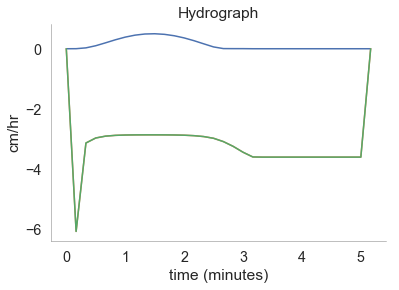

In [93]:
# plt.plot(sim['t_h']/60., sim['hydro']*3.6e3)
plt.plot(sim['t_p']/60., sim['flux1']*3.6e3)
plt.plot(sim['t_p']/60., sim['flux3']*3.6e3)

plt.xlabel('time (minutes)')
plt.ylabel('cm/hr')
plt.title('Hydrograph')


In [85]:
# fig = plt.figure(figsize= (15,6))
# plt.subplots_adjust(wspace = 0.3)

# for i, label in enumerate(('A', 'B', 'C')):
#     ax = plt.subplot(1,3,i+1)
#     ax.text(-0.05, 1.08, label, transform=ax.transAxes,
#       fontsize=16, fontweight='bold', va='top')

# ax1 = plt.subplot(131)
# color_topo(sim.zc, ax = ax1, dx = sim.dx)
# # veg_points(sim.isvegc, dx  = sim.dx, ax = ax1)
# # plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

# ax1 = plt.subplot(132)

# zinflplot = colormap(sim,sim['zinflc'], ax = ax1, clabel= '$I$ (cm)', colorbar = True ,
#                      cfontsize = 16, cround = 1)
# # # plot_c(sim.isvegc, dx = sim.dx, ax = ax1)

# # ax = plt.subplot(133)
# zinflplot = colormap(sim,sim['vmax'], ax = ax, clabel= r'$U_{max}$ (cm/s)' ,colorbar = True, cfontsize = 16,
#                      cround = 1, veg_scale=False)


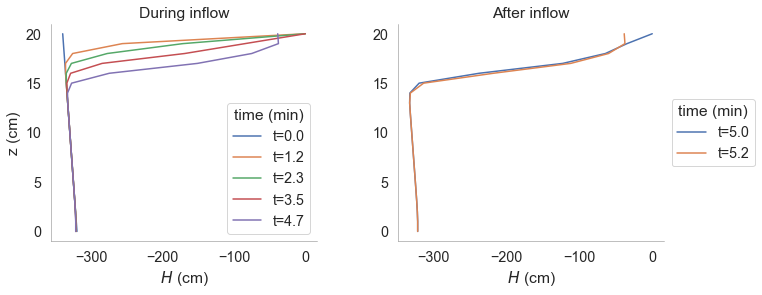

In [90]:
# Visualize wetting front at sample cells
z = np.arange(0, sim.zmax+sim.dz, sim.dz)

fig = plt.figure(1, figsize = (11,4)); 
ax1 = plt.subplot(121)
plt.subplots_adjust(wspace = .3)
plt.xlabel('$H$ (cm)')
plt.ylabel('z (cm)')
plt.title('During inflow')

inds = np.where(sim.t_p < sim.t_rain)[0]
freq = len(sim.t_p[inds])/4
for i in inds[::freq]:
    plt.plot(sim.vegH[i],z, label = 't={0:.1f}'.format(sim.t_p[i]/60), lw = 1.5)
ax1.legend(loc = 'best', title = 'time (min)')

ax2 = plt.subplot(122)
plt.xlabel('Soil moisture $cm^3/cm^3$')
plt.xlabel('$H$ (cm)')
plt.title('After inflow')
inds = np.where(sim.t_p >= sim.t_rain)[0]
freq = len(sim.t_p[inds])/4
for i in inds:
    plt.plot(sim.vegH[i],z, label = 't={0:.1f}'.format(sim.t_p[i]/60), lw = 1.5)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'time (min)')
